# Problem 1: The Maze and the Random Minotaur

The objective of problem 1 is to solve the maze and the random minotaur problem. We start first by describing the maze as a numpy array. 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import problem1.maze as mz
# Description of the maze as a numpy array
maze = np.array([
    [2, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 3, 0, 0],
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

The method `maze.draw_maze()` helps us draw the maze given its numpy array discription.  

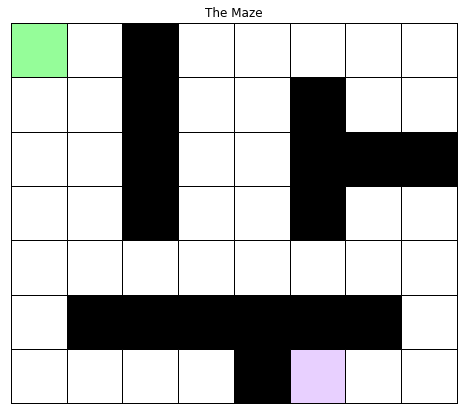

In [35]:
mz.draw_maze(maze)

In [40]:
# Create an environment maze
Minataur_Stay = True
env = mz.Maze(maze, Minataur_Stay)
# env.show()

##  Dynamic Programming 

Before solving the MDP problem, recall that the finite horizon objective function is 
$$
    \mathbb{E} \Big[ \sum_{t=0}^T r(s_t, a_t) \Big],
$$
where $T$ is the horizon.
Recall the Bellman equation 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V(s) = \max_{a \in \mathcal{A}} \Big\lbrace r(s,a) + \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,a) V(s') \Big\rbrace
\end{equation}
The dynamic programming solution for the finite horizon MDP problem consists of solving the above backward recursion. The method `maze.dynamic_programming` achieves this. 
> **Note:** To find the optimal path, it is enough to set the time horizon $T = 10$. Indeed, looking at the maze one can see that the player needs at least 10 steps to attain the exit $B$, if her starting position is at $A$. In fact if you set the time horizon less than 10, you will see that you do not find the optimal path.



In [41]:
# Finite horizon
horizon = 20
start  = (0,0,6,5)
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);

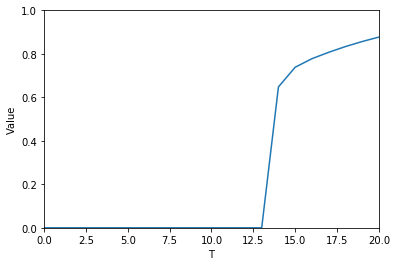

In [42]:
y = np.flip(V[env.map[start]])
plt.plot(y)
plt.ylim((0,1))
plt.xlim(0, horizon)
plt.xlabel("T")
plt.ylabel("Value")
plt.show()

In [7]:
# Simulate the shortest path starting from position A
method = 'DynProg';
path = env.simulate(start, policy, method);

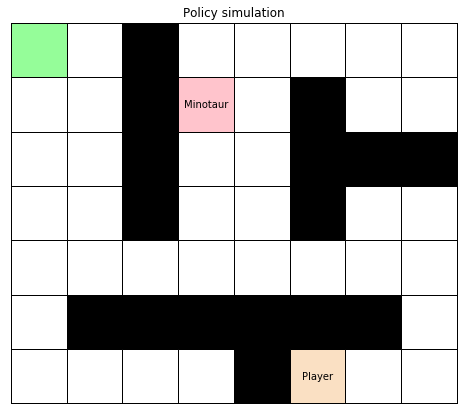

In [8]:
# Show the shortest path 
mz.animate_solution(maze, path, start)

# Problem 2: Robbing Banks

The objective of problem 2 is to solve the robbing banks problem. We start first by describing the maze as a numpy array. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import problem2.maze as mz

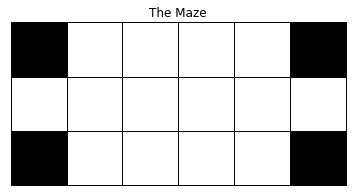

In [2]:
maze = np.array([
    [1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1],
])
# Description of the maze as a numpy array
# with the convention 
# 0 = empty cell
# 1 = bank
mz.draw_maze(maze)

## MDP formulation

In [3]:
# Create an environment maze
env = mz.Maze(maze)
#env.show()

## Value Iteration

Here we solve the discounted infinite-horizon MDP problem using value iteration, the objective here is to find a stationary policy $\pi$ that minimizes the infinite horizon objective with a discount factor $\gamma$ 
$$
    \mathbb{E} \Big[\sum_{t=0}^\infty \gamma^t r\big(s_t, \pi(s_t)\big) \Big].
$$
Recall the Bellman equation in the case of a stationary policy $\pi$ 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V^*(s) = \max_{\pi} \Big\lbrace r(s,\pi(s)) + \gamma \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,\pi(s)) V^*(s') \Big\rbrace
\end{equation}
or equivalently in terms of the Bellman operator $\mathcal{L}$ 
\begin{equation}
V^* =  \mathcal{L}(V^*)
\end{equation}
where 
\begin{equation}
   \forall s \in \mathcal{S} \qquad  \mathcal{L}(V)(s) = \max_{\pi} \Big\lbrace r(s,\pi(s)) + \gamma \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,\pi(s)) V(s') \Big\rbrace. 
\end{equation}
Value iteration solves the Bellman equation described above. This method is implemented as `maze.value_iteration` in the file [maze.py]().

> **Note:** Recall that the mapping $\mathcal{L}$ is a contraction, therefore value iteration converges. To achieve an $\varepsilon>0$ approximation (i.e. $\Vert V^* - V_{n+1} \Vert \le \varepsilon$),
 the stopping criterion of value iteration is $\Vert V - \mathcal{L}(V) \Vert < \frac{1-\gamma}{\gamma}\varepsilon$.

In [ ]:
'''
# Discount Factor 
GAMMAS = np.arange(0.1, 1, 0.01)#[0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]
# Accuracy treshold 
epsilon = 0.0001

start  = (0, 0, 1, 2)
Value = []
for i, gamma in enumerate(GAMMAS):
    print(i, end=" ")
    V, policy = mz.value_iteration(env, gamma, epsilon)
    Value.append(V[env.map[start]])
'''

In [ ]:
'''
print(Value)
plt.plot(GAMMAS, Value)
plt.xlabel("λ")
plt.ylabel("Value")
plt.show()
'''

In [19]:
# Discount Factor 

gamma   = 0.99
# Accuracy treshold 
epsilon = 0.0001
start  = (0, 0, 1, 2)
V, policy = mz.value_iteration(env, gamma, epsilon)

In [20]:
method = 'ValIter'
path = env.simulate(start, policy, method)

KeyboardInterrupt: 

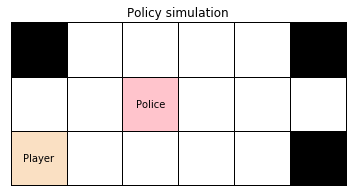

In [22]:
# Show the shortest path 
mz.animate_solution(maze, path, start)